# Ćw 06 - lab 19 - obliczenia


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
time = list(range(0, 1830, 30))

# fmt: off
pozycja_1 = [
    10, 5, 5, 5, 5, 10, 15, 20, 25, 30, 40, 40, 45, 45, 45, 40, 40, 35, 30, 25, 20, 20, 15, 15, 15, 20, 20, 20, 25, 30, 30,
    35, 35, 35, 40, 35, 35, 35, 30, 30, 25, 20, 20, 20, 20, 20, 20, 20, 25, 25, 25, 30, 30, 30, 30, 35, 30, 30, 30, 30, 25
]
pozycja_2 = [
    30, 35, 45, 55, 60, 70, 80, 75, 60, 50, 35, 30, 25, 25, 30, 40, 45, 55, 70, 80, 80, 75, 70, 65, 60, 55, 55, 50, 50, 50, 55,
    55, 60, 65, 70, 70, 75, 75, 75, 75, 75, 70, 70, 65, 65, 60, 60, 60, 55, 55, 55, 60, 60, 65, 65, 65, 70, 70, 70, 70, 70
]
# fmt: on

print(len(pozycja_1))

df = pd.DataFrame(
    {
        "Czas [s]": time,
        "Położenie plamki 1": pozycja_1,
        "Położenie plamki 2": pozycja_2,
    }
)

61


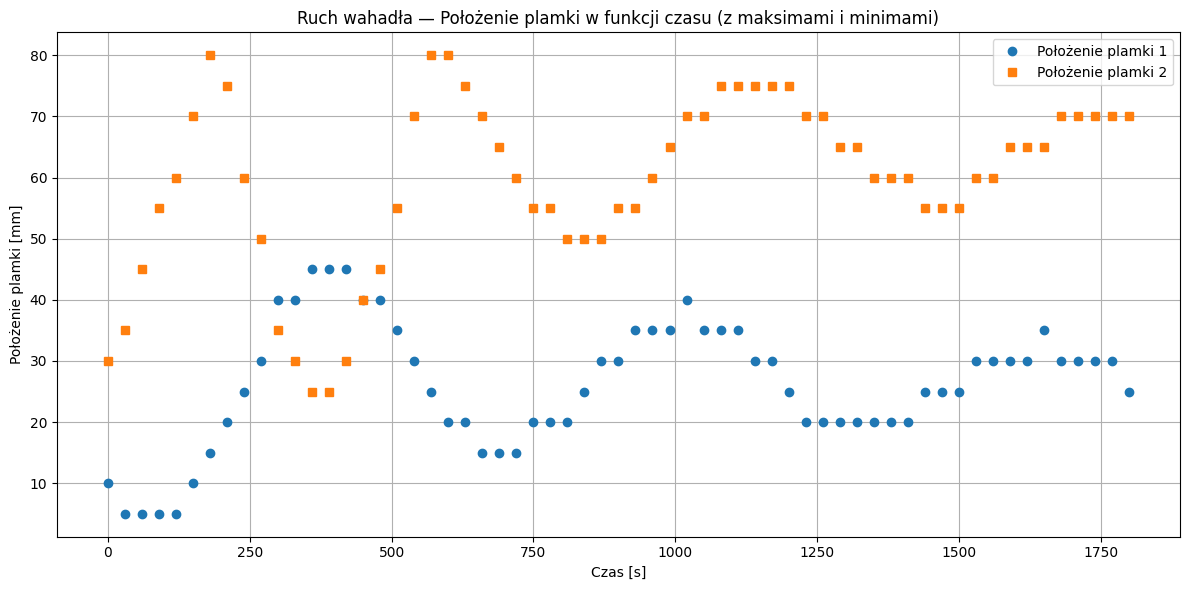

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df["Czas [s]"], df["Położenie plamki 1"], "o", label="Położenie plamki 1")
plt.plot(df["Czas [s]"], df["Położenie plamki 2"], "s", label="Położenie plamki 2")

plt.xlabel("Czas [s]")
plt.ylabel("Położenie plamki [mm]")
plt.title("Ruch wahadła — Położenie plamki w funkcji czasu (z maksimami i minimami)")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

## Wyznaczanie środków oscylacji

$$
\begin{align*}
b_{01} & = \frac{\frac{b_1+b_3}{2}+b_2}{2} = \frac{b_1}{4} + \frac{b_2}{2} + \frac{b_3}{4} \rightarrow \text{pierwsze ustawienie}; \\
b_{02} & = \frac{\frac{b_1+b_3}{2}+b_2}{2} = \frac{b_1}{4} + \frac{b_2}{2} + \frac{b_3}{4} \rightarrow \text{drugie ustawienie}.
\end{align*}
$$


In [35]:
# def oscillation_center(b1: int, b2: int, b3: int):
#     return ((b1 + b3) / 2 + b2) / 2


# # Trzy wybrane (dowolne) następujące po sobie ekstrema
# b01 = oscillation_center(45, 15, 40)
# b02 = oscillation_center(80, 50, 75)
# Delta_b = b02 - b01

# print(b01, b02)
# print(Delta_b)

### Plot with oscillation centers


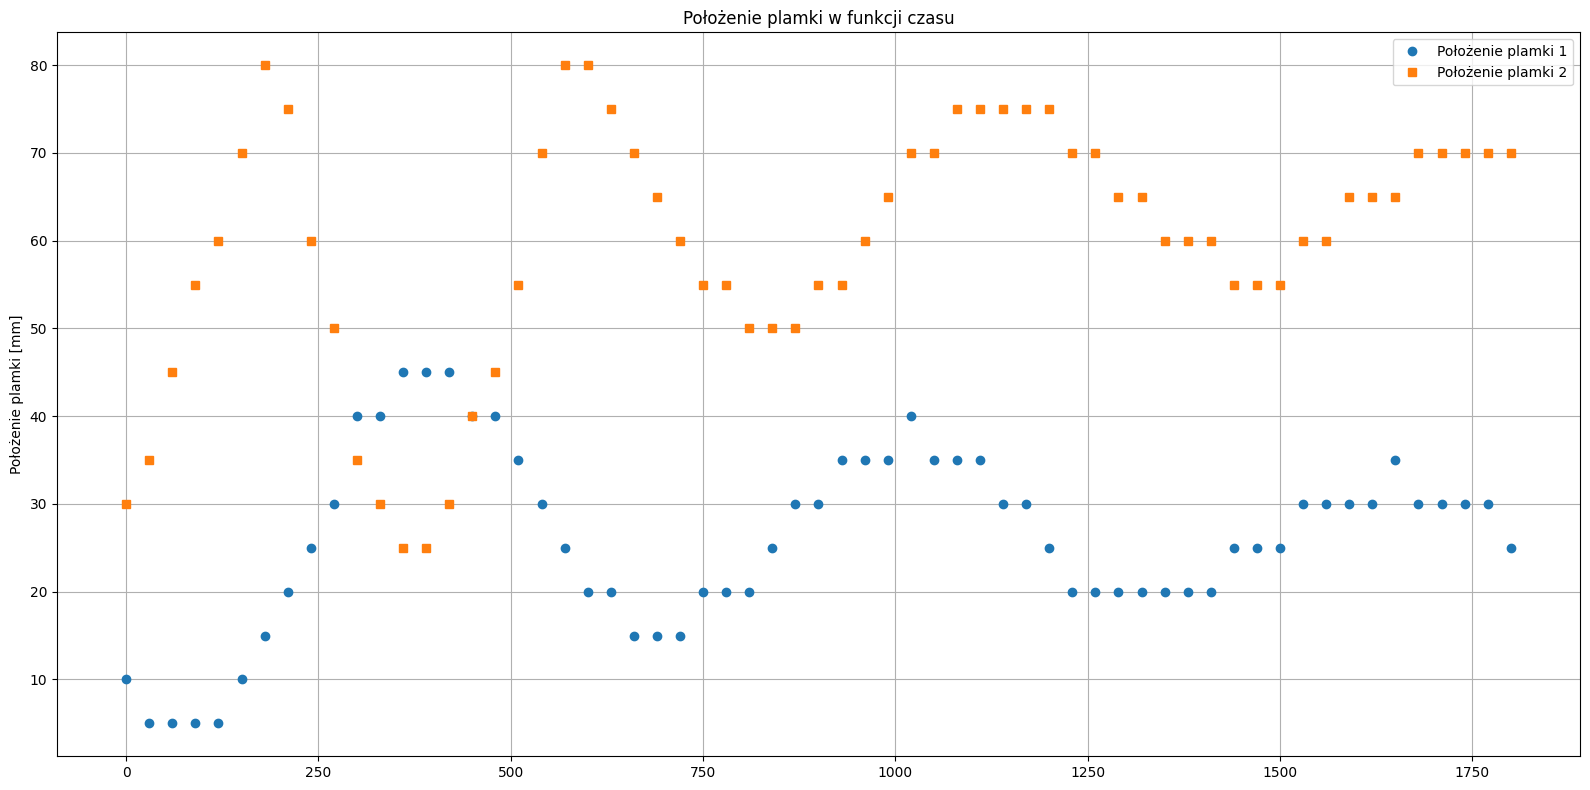

In [36]:
plt.figure(figsize=(16, 8))
plt.plot(df["Czas [s]"], df["Położenie plamki 1"], "o", label="Położenie plamki 1")
plt.plot(df["Czas [s]"], df["Położenie plamki 2"], "s", label="Położenie plamki 2")

# plt.axhline(
#     y=b01,
#     color="g",
#     linestyle="--",
#     label=f"Położenie równowagi 1 (b01 = {b01:.1f} mm)",
# )
# plt.axhline(
#     y=b02,
#     color="g",
#     linestyle="--",
#     label=f"Położenie równowagi 2 (b02 = {b02:.1f} mm)",
# )

plt.ylabel("Położenie plamki [mm]")
plt.title("Położenie plamki w funkcji czasu")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

## Plot with oscillation centers and best fit line


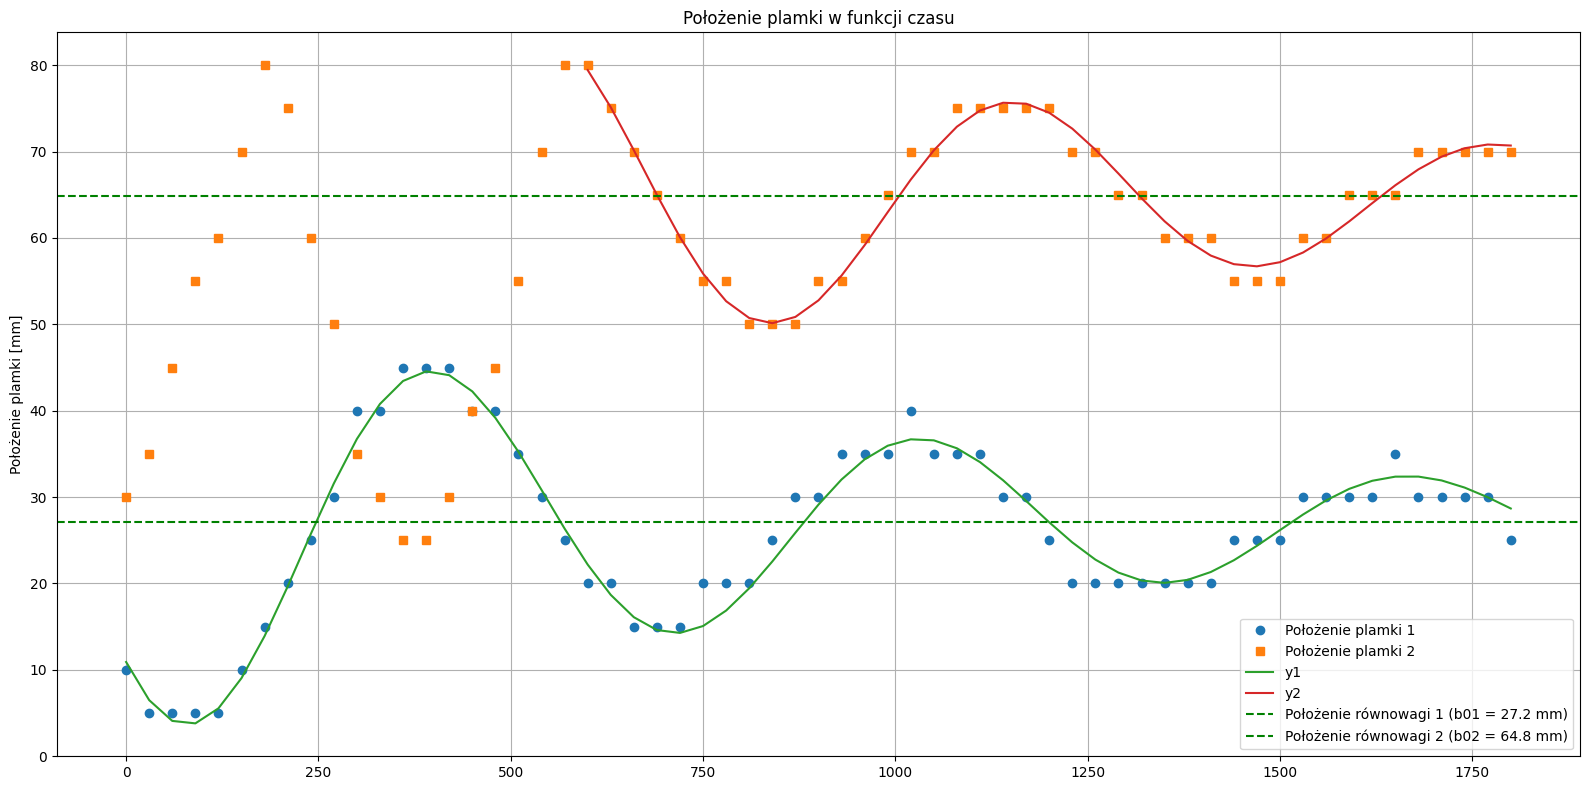

In [37]:
time = np.arange(0, 1830, 30)


def damped_oscillation(y_0, lam, A, T, time, phi):
    omega = 2 * np.pi / T

    return y_0 + A * np.exp(-lam * time) * np.cos(omega * time + phi)
    # return y_0 + A * np.sin(omega * time + phi)


b01 = 27.166988372802734
T1 = 634.4935551896855
y1 = damped_oscillation(
    y_0=b01,
    lam=0.0009433386755771324,
    A=25.436559677124023,
    T=T1,
    time=time,
    phi=-4.018937110900879,
)

b02 = 64.818626403808
T2 = 626.7257885510934
y2 = damped_oscillation(
    y_0=b02,
    lam=0.000947718053567605,
    A=18.489604949951172,
    T=T2,
    time=time[:41],
    phi=0.6585540771484375,
)
time2 = time[20:]


plt.figure(figsize=(16, 8))
plt.plot(df["Czas [s]"], df["Położenie plamki 1"], "o", label="Położenie plamki 1")
plt.plot(df["Czas [s]"], df["Położenie plamki 2"], "s", label="Położenie plamki 2")

plt.plot(time, y1, label="y1")
plt.plot(time2, y2, label="y2")

plt.axhline(
    y=b01,
    color="g",
    linestyle="--",
    label=f"Położenie równowagi 1 (b01 = {b01:.1f} mm)",
)
plt.axhline(
    y=b02,
    color="g",
    linestyle="--",
    label=f"Położenie równowagi 2 (b02 = {b02:.1f} mm)",
)

plt.ylabel("Położenie plamki [mm]")
plt.title("Położenie plamki w funkcji czasu")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

## Stała grawitacyjna

$$
G = \frac{\pi^2 r^2 d \Delta b}{MT^2L}
$$


In [44]:
Delta_b = b02 - b01
print(Delta_b)

T = (T1 + T2) / 2
print(T)

37.65163803100526
630.6096718703894


In [39]:
# odległość zwierciadła od ekranu
L = 0.86
# masa dużej kulki
M = 1.5
# odległość między środkami mas M i m
r = 0.047
# odległość małej kulki od osi obrotu
d = 0.05

Delta_b_meter = Delta_b * 1e-3

G = (np.pi**2 * r**2 * d * Delta_b_meter) / (M * T**2 * L)
print(G)

8.000891397466227e-11


## Niepewność


In [40]:
def argh():
    Delta_T = 30
    u_T = Delta_T / np.sqrt(3)

    Delta_b = 0.005
    u_b = Delta_b / np.sqrt(3)

    u_Delta_b = np.sqrt(3 / 8) * u_b
    print(u_Delta_b)

In [41]:
print(Delta_b)

37.65163803100526


$$
\Delta G = | \frac{-2G}{T} \Delta T | + | \frac{G}{\Delta b} \Delta( \Delta b ) |
$$


In [42]:
Delta_T = 60
Delta_Delta_b = 0.01
Delta_b_meter = Delta_b * 1e-3

Delta_G = np.abs(-2 * G / T * Delta_T) + np.abs(G / Delta_b_meter * Delta_Delta_b)
print(Delta_G)

3.647484239667256e-11


## Masa Ziemi

$$
   M_Z = \frac{gR_Z^2}{G}
$$


In [43]:
g = 9.81
R_Z = 6.38 * 10**6
M_z = g * R_Z**2 / G
print(M_z)

4.990820949356419e+24
